## SETUP

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
import glob
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

## Data

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
stack = pd.read_csv('developer_dataset.csv')

C:\Users\aanan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Check data and structure
print(stack.shape)
stack.head(2)

(111209, 21)


,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN


In [4]:
# Column Names

stack.columns

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')

We see that the data provides information that identify individuals, their profession/experiences, and their future aspirations.

In [5]:
# Row counts
stack.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

From the counts, we see that many variables have missing data! Some variables have more than 60% missing data.

In [6]:
# Data types
stack.dtypes

RespondentID                int64
Year                        int64
Country                    object
Employment                 object
UndergradMajor             object
DevType                    object
LanguageWorkedWith         object
LanguageDesireNextYear     object
DatabaseWorkedWith         object
DatabaseDesireNextYear     object
PlatformWorkedWith         object
PlatformDesireNextYear     object
Hobbyist                   object
OrgSize                    object
YearsCodePro              float64
JobSeek                    object
ConvertedComp             float64
WorkWeekHrs               float64
NEWJobHunt                 object
NEWJobHuntResearch         object
NEWLearn                   object
dtype: object

All numeric variables are coded as float and/or integer. However, we notice that there are some columns with many layers of information which could potentially be split into different variables/columns.

In [7]:
# Summary statistics for numerical
stack.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


We see that we can try to find the relationship between work hours, compensation, years of expeirence, and other non-numeric variables.

In [8]:
#Missing Data
print(stack.count()/len(stack)) # provides the proportion of available data per variable.

#Remove variables with less than 40% available data
stack = stack.drop(columns=['NEWJobHunt','NEWJobHuntResearch','NEWLearn'])

stack.shape # we see there are now 18 columns, instead of 21.

RespondentID              1.000000
Year                      1.000000
Country                   1.000000
Employment                0.983958
UndergradMajor            0.885297
DevType                   0.903101
LanguageWorkedWith        0.917354
LanguageDesireNextYear    0.863635
DatabaseWorkedWith        0.772051
DatabaseDesireNextYear    0.667518
PlatformWorkedWith        0.823755
PlatformDesireNextYear    0.767708
Hobbyist                  0.614627
OrgSize                   0.492802
YearsCodePro              0.852386
JobSeek                   0.544524
ConvertedComp             0.821273
WorkWeekHrs               0.459396
NEWJobHunt                0.171991
NEWJobHuntResearch        0.167999
NEWLearn                  0.217842
dtype: float64


(111209, 18)

# ANALYSIS

For the analysis of work metrics, it would be nice to have respondents, their job-type/employment status and the type of developer they are. As we look at the data, we see that employment status and devtype have limited missing data!

We want to know what kind of missing data we have.

                RespondentID
Country                     
Canada                  8979
China                   2072
France                  6861
Germany                16215
Japan                   1049
Mexico                  1918
Spain                   4534
United Kingdom         15854
United States          53727


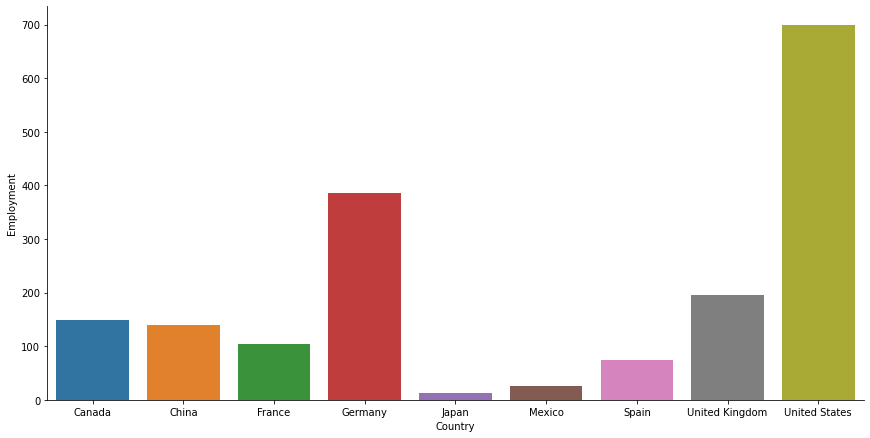

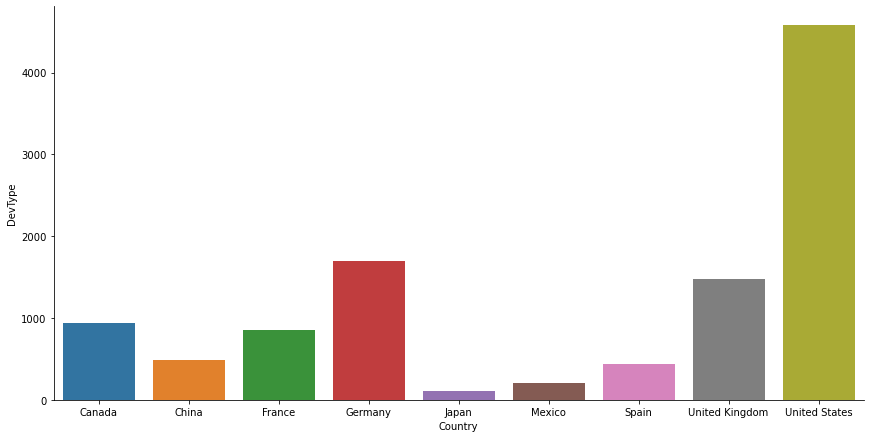

In [9]:
#Count of Developers by Country
print(stack[['RespondentID','Country']].groupby('Country').count())

#Subset of rows that contains missing data in 'Employment' or 'DevType'
missingData = stack[['Employment','DevType']].isnull().groupby(stack['Country']).sum().reset_index()

#Plot of missing data for Employment
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
plt.show()
plt.close()

#Plot of missing data for DevType
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)
plt.show()
plt.close()

From the above three outputs, we see that most of the developers are from the United States, and the missing values are relatively proportional. Hence, it is likely that the missing data may be missing completely at random (MCAR).

We also note that US, Germany, and the UK have the most developers.

Because we ascribe the missing values as MCAR, it is safe to delete the missing values from these variables without affecting our analysis in any significant way.

In [10]:
stack.dropna(subset = ['Employment','DevType'],
                    inplace = True,
                    how = 'any')

#recheck the counts of each variable of the dataframe as % of available data per variable
stack.count()/len(stack)

RespondentID              1.000000
Year                      1.000000
Country                   1.000000
Employment                1.000000
UndergradMajor            0.906077
DevType                   1.000000
LanguageWorkedWith        0.935374
LanguageDesireNextYear    0.881230
DatabaseWorkedWith        0.802611
DatabaseDesireNextYear    0.693633
PlatformWorkedWith        0.842731
PlatformDesireNextYear    0.785726
Hobbyist                  0.599450
OrgSize                   0.538625
YearsCodePro              0.865736
JobSeek                   0.569652
ConvertedComp             0.833368
WorkWeekHrs               0.503046
dtype: float64

We see that, as a result of dropping observations missing either 'employment' or 'devtype', we were able to remove observations across other variables as well!

Now, as we discussed above, variables are quite descriptive, which make bucketing/grouping to carry out streamlined analyses hard. We will try to create categories for the 'devtype' to align with the major development roles: Front-end, Back-end, Full-stack, Mobile, Admin.

C:\Users\aanan\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\aanan\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


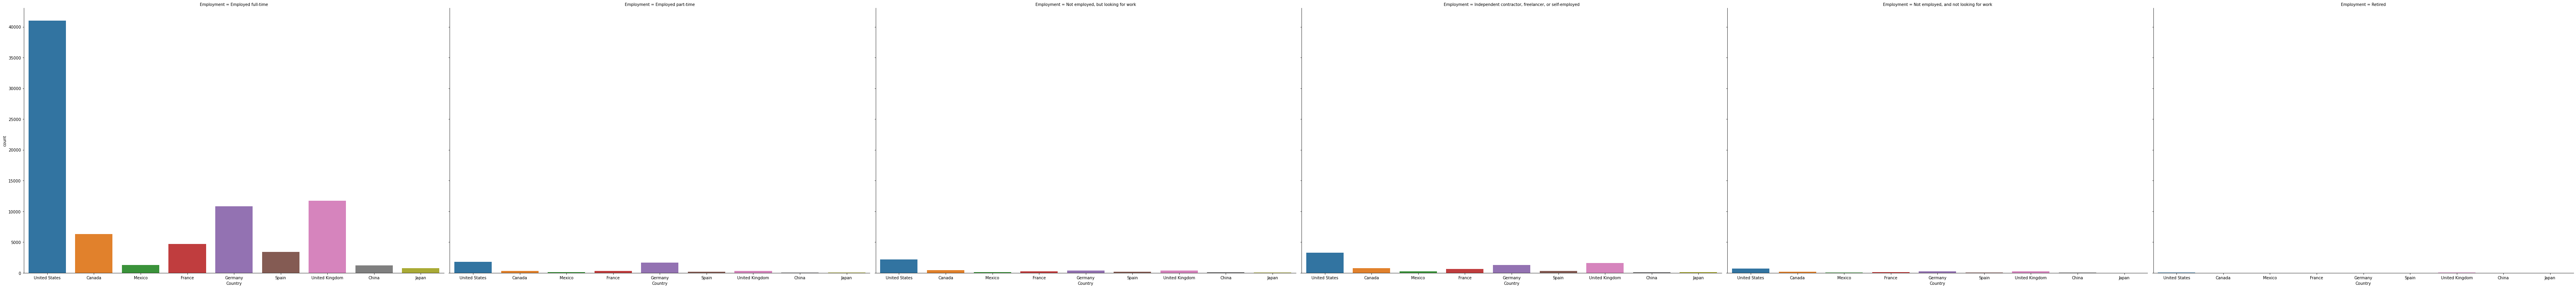

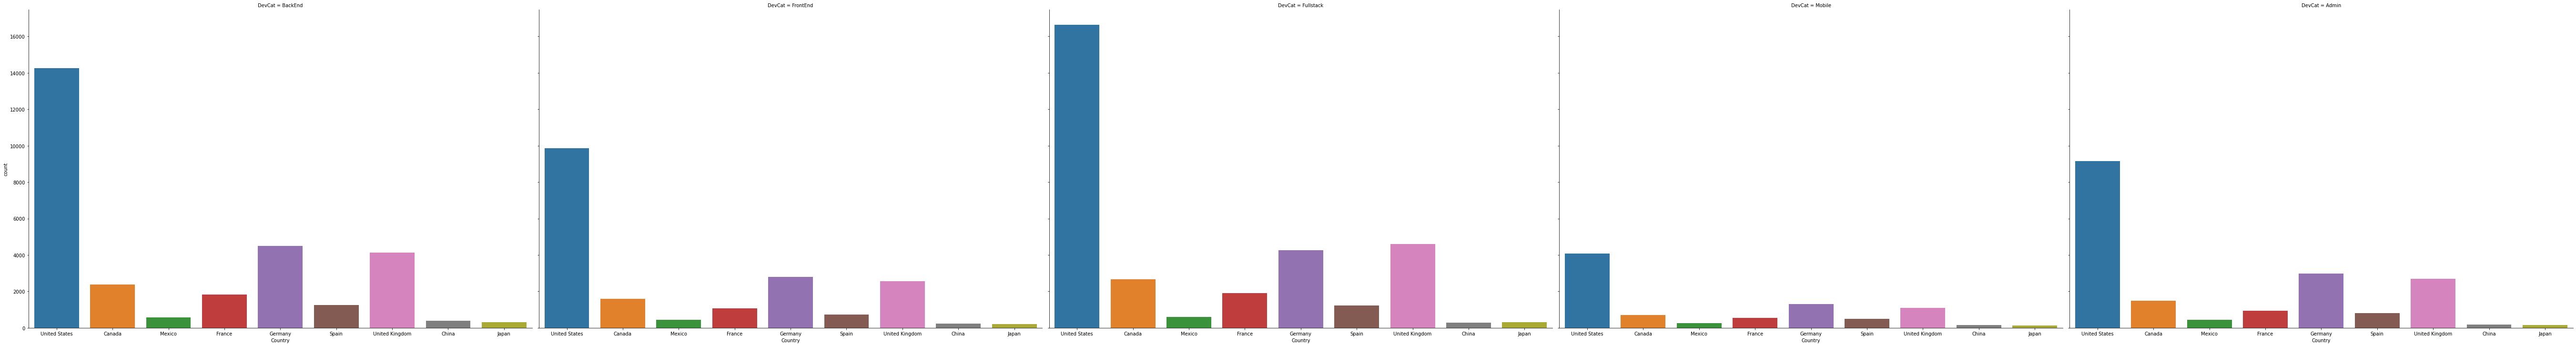

In [11]:
empfig = sns.catplot(x="Country", col="Employment",
                data=stack, kind="count",
                height=10, aspect=1.5);
 
# Focus on a few of the key developer types outlined in the _stack Overflow survey
dev_stack = stack[['Country','DevType']]
dev_stack.loc[dev_stack['DevType'].str.contains('back-end'), 'BackEnd'] = True
dev_stack.loc[dev_stack['DevType'].str.contains('front-end'), 'FrontEnd'] = True
dev_stack.loc[dev_stack['DevType'].str.contains('full-stack'), 'Fullstack'] = True
dev_stack.loc[dev_stack['DevType'].str.contains('mobile'), 'Mobile'] = True
dev_stack.loc[dev_stack['DevType'].str.contains('administrator'), 'Admin'] = True
 
dev_stack = dev_stack.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','Fullstack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')
 
dev_stack.dropna(how='any', inplace=True)
 
devFig = sns.catplot(x="Country", col="DevCat",
                data=dev_stack, kind="count",
                height=10, aspect=1.5);

plt.show()
plt.close()

Note: Please click on each image to enlarge and scroll left to right

From the charts, we see that a majority of developers are employed full-time.

We also see that majority of developers are Frontend, Backend, or Full-stack, rather than mobile.

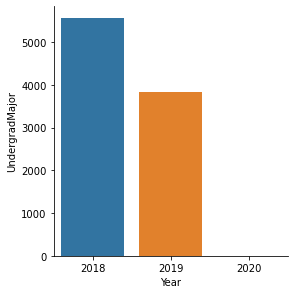

In [13]:
# Check the educational backgroun

missing_major = stack['UndergradMajor'].isnull().groupby(stack['Year']).sum().reset_index() #subset of data with missing major
 
sns.catplot(x="Year", y="UndergradMajor",
                data=missing_major, kind="bar",
                height=4, aspect=1);
plt.show()
plt.close()

We see that 2018 and 2019 have missing majors however 2020 has no missing majors!

In [14]:
# Sort by ID and Year so that each person's data is carried backwards correctly
stack = stack.sort_values(['RespondentID','Year'])
 
stack['UndergradMajor'].bfill(axis=0, inplace=True) #using NOCB (backfill)

Now, we can analyze this clean dataset to find the relationship between majors and year.

<ipython-input-15-7a3c17e64b08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stack_edu.dropna(how='any', inplace=True)
C:\Users\aanan\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\aanan\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

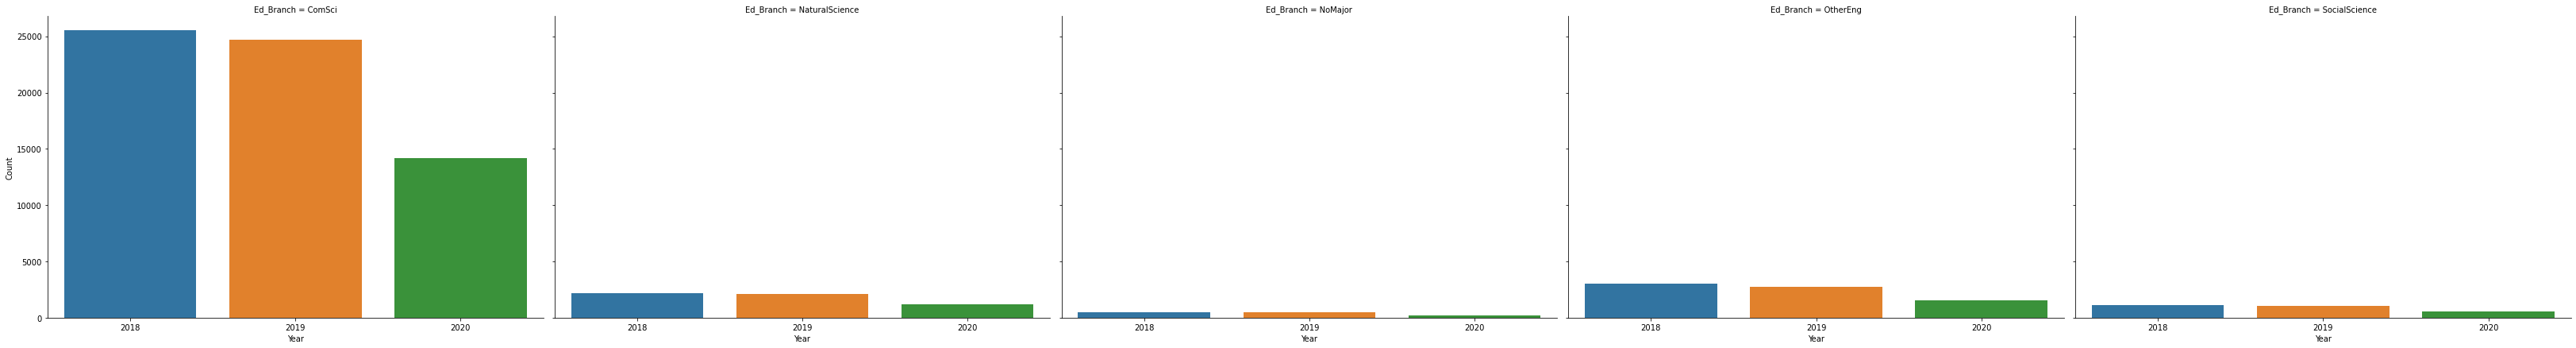

In [15]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
stack_edu = stack[['Year','UndergradMajor']]
stack_edu.dropna(how='any', inplace=True)
stack_edu.loc[stack_edu['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
stack_edu.loc[stack_edu['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
stack_edu.loc[stack_edu['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
stack_edu.loc[stack_edu['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
stack_edu.loc[stack_edu['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
stack_edu.loc[stack_edu['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True
 
stack_edu = stack_edu.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='Ed_Branch',
    value_name='Count')
 
stack_edu.dropna(how='any', inplace=True)
stack_edu = stack_edu.groupby(['Year','Ed_Branch']).count().reset_index()
 
Fig = sns.catplot(x="Year", y='Count', col="Ed_Branch",
                data=stack_edu, kind="bar",
                height=6, aspect=1.5);
plt.show()
plt.close()

From the charts above, we can clearly see that most developers have a background in Computer Science. Very few in the field come from other educational backgrounds.

It may be interesting to also look at the relationship between years of experience and compensation.

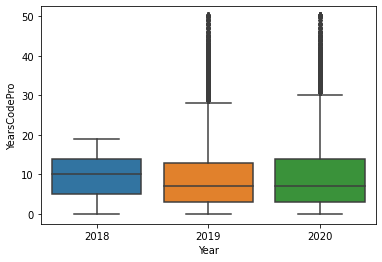

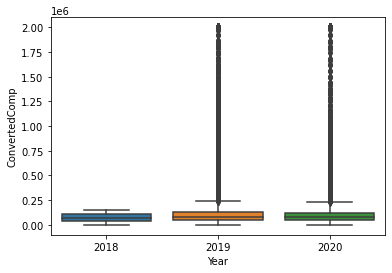

In [17]:
comp_sub = stack[['Year','YearsCodePro','ConvertedComp']]
 
D = sns.boxplot(x="Year", y="YearsCodePro",
            data=comp_sub)
plt.show()
plt.close()
E = sns.boxplot(x="Year", y="ConvertedComp",
            data=comp_sub)
plt.show()
plt.close()

There appears to be a consistent distribution of experience and compenation, year-on-year. There may be a strong correlation between the two variables.

Below, we will fill missing data using Multiple Imputation:

In [19]:
stack_impute = stack[['YearsCodePro','ConvertedComp']] #subset variables we are imputing

traindf, testdf = train_test_split(stack_impute, train_size=0.1) #split data into training and testing sets
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(stack_impute)
 
# Transform the model on the entire dataset
imputed_comp = pd.DataFrame(np.round(imp.transform(stack_impute),0), columns=['YearsCodePro','ConvertedComp'])

The above code imputes missing values, which will help us examine the relationship between experience and compensation below.

<ipython-input-21-c4986945c15f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlot['CodeYearBins'] = pd.qcut(compPlot['YearsCodePro'], q=5)


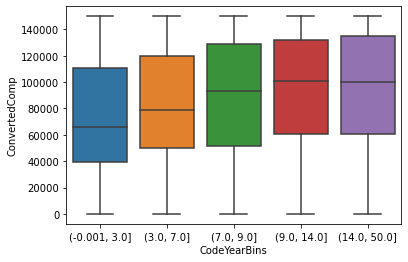

In [21]:
compPlot = imputed_comp.loc[imputed_comp['ConvertedComp'] <= 150000]
compPlot['CodeYearBins'] = pd.qcut(compPlot['YearsCodePro'], q=5) #split the experience years into quintile groups
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlot)
plt.show()
plt.close()

We see that there are significant overlaps between all years of experience - i.e., developers are offered high compensation regardless of their experience level. However, we also see the IQR shifting higher and higher upwards as developers have more years of experience.